In [4]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from glob import iglob
from os.path import join
import pandas as pd
import geopandas as gpd

In [73]:
import xarray as xr
#DS = xr.open_dataset('L3_data/S5P_OFFL_L3__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.nc')

DS2 = xr.open_dataset('L2_data/S5P_OFFL_L2__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.nc')
DS2


<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/53)
    Conventions:                        CF-1.7
    institution:                        KNMI
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    summary:                            TROPOMI/S5P NO2 1-Orbit L2 Swath 5.5x...
    tracking_id:                        e1a46830-e4b6-4f51-b9b0-930033b4c22c
    id:                                 S5P_OFFL_L2__NO2____20230201T002420_2...
    ...                                 ...
    Status_MET_2D:                      Nominal
    Status_NISE__:                      Nominal
    Status_CTMFCT:                      Nominal
    history:                            2023-02-02 16:39:54 f_s5pops tropnll2...
    processing_status:                  OFFL-processing nominal product
    date_modified:                      2023-02-09T12:43:57Z

In [79]:
import glob
import xarray as xr

# Path to the L2_data folder
folder_path = 'L3_data'

# Get a list of .nc files in the folder
file_list = glob.glob(f"{folder_path}/*.nc")

# Loop through each file
for file_path in file_list:
    # Open the file with xarray
    DS = xr.open_dataset(file_path)

    # Convert to DataFrame
    df = DS.to_dataframe(dim_order=['time', 'latitude', 'longitude'])

    # Save as CSV
    csv_path = file_path.replace(".nc", ".csv")
    df.to_csv(csv_path)

    print(f"Converted {file_path} to {csv_path}")


Converted L3_data\S5P_OFFL_L3__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.nc to L3_data\S5P_OFFL_L3__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.csv
Converted L3_data\S5P_OFFL_L3__NO2____20230201T071021_20230201T085151_27480_03_020400_20230202T232710.nc to L3_data\S5P_OFFL_L3__NO2____20230201T071021_20230201T085151_27480_03_020400_20230202T232710.csv
Converted L3_data\S5P_OFFL_L3__NO2____20230201T085151_20230201T103321_27481_03_020400_20230203T011437.nc to L3_data\S5P_OFFL_L3__NO2____20230201T085151_20230201T103321_27481_03_020400_20230203T011437.csv
Converted L3_data\S5P_OFFL_L3__NO2____20230201T103321_20230201T121451_27482_03_020400_20230203T030119.nc to L3_data\S5P_OFFL_L3__NO2____20230201T103321_20230201T121451_27482_03_020400_20230203T030119.csv
Converted L3_data\S5P_OFFL_L3__NO2____20230201T121451_20230201T135622_27483_03_020400_20230203T043603.nc to L3_data\S5P_OFFL_L3__NO2____20230201T121451_20230201T135622_27483_03_020400_

In [69]:
import xarray as xr

# the line above is necessary for getting 
# your plot embedded within the notebook
%matplotlib inline

dset = xr.open_dataset('L3_data/S5P_OFFL_L3__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.nc')
df = dset.to_dataframe()
print(df)
df.to_csv('output1.csv') 


                           sensor_altitude  solar_zenith_angle  \
time latitude   longitude                                        
0    -84.815312 38.408186      855857.3125           76.249725   
                38.418186      855857.3125           76.249725   
                38.428186      855857.3125           76.249725   
                38.438186      855857.3125           76.249725   
                38.448186      855857.3125           76.249725   
...                                    ...                 ...   
     -80.515312 41.958186              NaN                 NaN   
                41.968186              NaN                 NaN   
                41.978186              NaN                 NaN   
                41.988186              NaN                 NaN   
                41.998186              NaN                 NaN   

                           solar_azimuth_angle  sensor_zenith_angle  \
time latitude   longitude                                             

In [64]:
print(dset['tropospheric_NO2_column_number_density'])

<xarray.DataArray 'tropospheric_NO2_column_number_density' (time: 1,
                                                            latitude: 431,
                                                            longitude: 360)>
[155160 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -84.82 -84.81 -84.8 ... -80.54 -80.53 -80.52
  * longitude  (longitude) float64 38.41 38.42 38.43 38.44 ... 41.98 41.99 42.0
Dimensions without coordinates: time
Attributes:
    description:  tropospheric vertical column of NO2
    units:        mol/m2


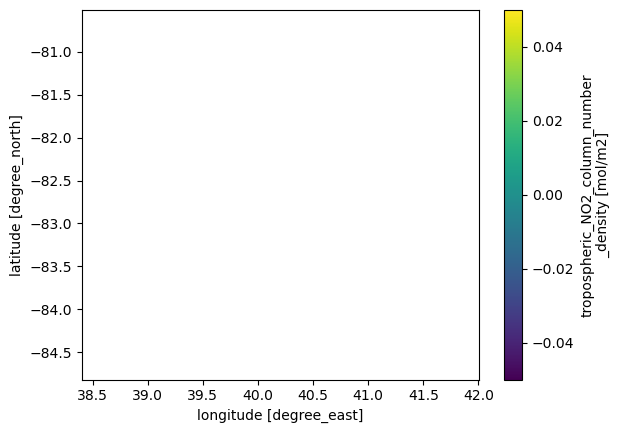

In [65]:
dset['tropospheric_NO2_column_number_density'].plot()

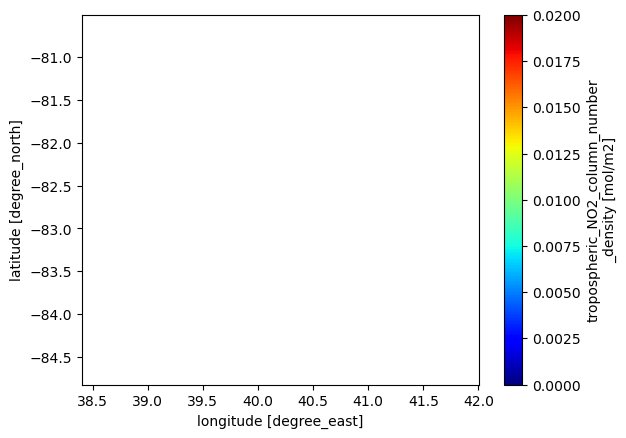

In [66]:
dset['tropospheric_NO2_column_number_density'].plot(cmap='jet', vmax=0.02)


c:\Users\christopher.prattos\AppData\Local\anaconda3\envs\sent5p\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


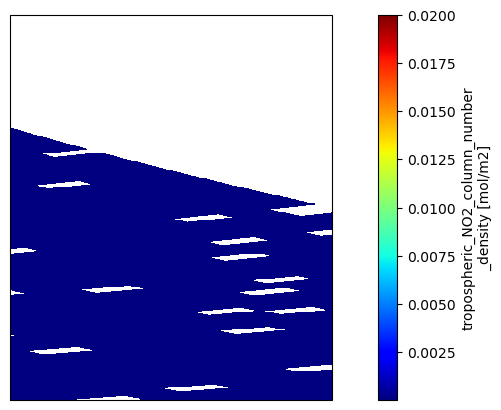

In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['tropospheric_NO2_column_number_density'].plot(ax=ax, vmax=0.02, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [ ]:
import xarray as xr
DS = xr.open_dataset('processed/processed__NO2___/NO2___1-2-2023__6-2-2023.nc')
# print("Original dimensions:", DS.dims)

null_values = DS['tropospheric_NO2_column_number_density'].isnull()
#print(null_values)



# Open the existing NetCDF file
#DS = xr.open_dataset('yourfile.nc')

# Drop rows where 'tropospheric_NO2_column_number_density' is NaN or missing
filtered_ds = DS.dropna(dim='time',  # replace 'time' with the name of your dimension (could be 'lat', 'lon', etc.)
                        subset=['tropospheric_NO2_column_number_density'])
print("Filtered dimensions:", filtered_ds.dims)

# Write the filtered dataset to a new NetCDF file
filtered_ds.to_netcdf('processed/updates_NO2___1-2-2023__6-2-2023.nc')


In [37]:
DS

<xarray.Dataset>
Dimensions:                                  (latitude: 456, longitude: 402,
                                              time: 9)
Coordinates:
  * latitude                                 (latitude) float64 -84.82 ... 40.97
  * longitude                                (longitude) float64 -80.74 ... 42.0
  * time                                     (time) datetime64[ns] 2023-02-01...
Data variables: (12/13)
    sensor_altitude                          (time, latitude, longitude) float64 ...
    solar_zenith_angle                       (time, latitude, longitude) float64 ...
    solar_azimuth_angle                      (time, latitude, longitude) float64 ...
    sensor_zenith_angle                      (time, latitude, longitude) float64 ...
    sensor_azimuth_angle                     (time, latitude, longitude) float64 ...
    tropospheric_NO2_column_number_density   (time, latitude, longitude) float64 ...
    ...                                       ...
    stratospheric_NO2_column_number_density  (time, latitude, longitude) float64 ...
    NO2_slant_column_number_density          (time, latitude, longitude) float64 ...
    cloud_fraction                           (time, latitude, longitude) float64 ...
    absorbing_aerosol_index                  (time, latitude, longitude) float64 ...
    tropopause_pressure                      (time, latitude, longitude) float64 ...
    spatial_ref                              int32 ...
Attributes:
    Conventions:     HARP-1.0
    source_product:  S5P_OFFL_L2__NO2____20230206T172610_20230206T190740_2755...
    history:         2023-05-31T14:14:42Z [harp-1.17] harp.import_product('L2...

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np

# Define the coordinates for the larger square around East Palestine and Youngstown, OH
coordinates = [
    [40.983576, -80.747011],  # NW corner
    [40.983576, -80.318249],  # NE corner
    [40.727726, -80.318249],  # SE corner
    [40.727726, -80.747011],  # SW corner
    [40.983576, -80.747011]   # Back to NW corner
]

# Create a map centered on East Palestine, OH
map_ep = folium.Map(location=[40.847819, -80.532845], zoom_start=12)

# Add a polygon with the coordinates to the map
folium.Polygon(coordinates, color="red", fill=True).add_to(map_ep)

# Extract the tropospheric NO2 data
data = pd.read_csv("processed/cleaneddata.csv")
tropospheric_NO2 = data['tropospheric_NO2_column_number_density']

# Compute the average tropospheric NO2 values
average_tropospheric_NO2 = np.mean(tropospheric_NO2, axis=0)


# Create a heatmap layer using the average tropospheric NO2 values
heatmap_layer = folium.FeatureGroup(name='Tropospheric NO2 Heatmap')
folium.plugins.HeatMap(data=average_tropospheric_NO2, min_opacity=0.2, max_val=np.max(average_tropospheric_NO2)/2,
                       radius=20, blur=5).add_to(heatmap_layer)

# Add the heatmap layer to the map
heatmap_layer.add_to(map_ep)

# Add a layer control to toggle the heatmap on/off
folium.LayerControl().add_to(map_ep)

# Display the map
map_ep


In [ ]:
import folium
import numpy as np

# Define the coordinates for the larger square around East Palestine and Youngstown, OH
coordinates = [
    [40.983576, -80.747011],  # NW corner
    [40.983576, -80.318249],  # NE corner
    [40.727726, -80.318249],  # SE corner
    [40.727726, -80.747011],  # SW corner
    [40.983576, -80.747011]   # Back to NW corner
]

# Create a map centered on East Palestine, OH
map_ep = folium.Map(location=[40.847819, -80.532845], zoom_start=12)

# Add a polygon with the coordinates to the map
folium.Polygon(coordinates, color="red", fill=True).add_to(map_ep)

# Extract the tropospheric NO2 data
tropospheric_NO2 = DS['tropospheric_NO2_column_number_density']

# Compute the average tropospheric NO2 values
average_tropospheric_NO2 = np.mean(tropospheric_NO2, axis=0)

# Create a heatmap layer using the average tropospheric NO2 values
heatmap_layer = folium.FeatureGroup(name='Tropospheric NO2 Heatmap')
folium.plugins.HeatMap(average_tropospheric_NO2, min_opacity=0.2, max_val=np.max(average_tropospheric_NO2),
                       radius=10, blur=15).add_to(heatmap_layer)

# Add the heatmap layer to the map
heatmap_layer.add_to(map_ep)

# Add a layer control to toggle the heatmap on/off
folium.LayerControl().add_to(map_ep)

# Display the map
map_ep


In [33]:
# Extract the tropospheric NO2 data
data = pd.read_csv("processed/cleaneddata.csv")
tropospheric_NO2 = data['tropospheric_NO2_column_number_density']

In [ ]:
from ncplot import view
view("infile.nc", vars= "image")

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Define the coordinates for the larger square around East Palestine and Youngstown, OH
coordinates = [
    [40.983576, -80.747011],  # NW corner
    [40.983576, -80.318249],  # NE corner
    [40.727726, -80.318249],  # SE corner
    [40.727726, -80.747011],  # SW corner
    [40.983576, -80.747011]   # Back to NW corner
]

# Create a map centered on East Palestine, OH
map_ep = folium.Map(location=[40.847819, -80.532845], zoom_start=12)

# Add a polygon with the coordinates to the map
folium.Polygon(coordinates, color="red", fill=True).add_to(map_ep)

# Extract the tropospheric NO2 data
tropospheric_NO2 = DS['tropospheric_NO2_column_number_density']

# Compute the average tropospheric NO2 values
average_tropospheric_NO2 = np.mean(tropospheric_NO2, axis=0)

# Filter out non-zero values from the average tropospheric NO2 array
zero_tropospheric_NO2 = average_tropospheric_NO2.flatten()[average_tropospheric_NO2.flatten() == 0]

# Create a heatmap layer using the zero tropospheric NO2 values
heatmap_layer = folium.FeatureGroup(name='Tropospheric NO2 Heatmap')
folium.plugins.HeatMap(zero_tropospheric_NO2, min_opacity=0.2, max_val=0,
                       radius=10, blur=15).add_to(heatmap_layer)

# Add the heatmap layer to the map
heatmap_layer.add_to(map_ep)

# Add a layer control to toggle the heatmap on/off
folium.LayerControl().add_to(map_ep)

# Display the map
map_ep


In [23]:

DS2 = xr.open_mfdataset('processed/processed__NO2___/NO2___1-2-2023__6-2-2023.nc')

a = DS2.sel(time=slice('2023-02-01', '2023-02-05'))
a = a.resample(time='1D').mean(dim='time', skipna=None)

b_mean = a.mean(dim='time')
no2_mean = b_mean['tropospheric_NO2_column_number_density']
print(no2_mean)

# DS2.mean(dim='time')
 
# no2_DS2 = DS2['tropospheric_NO2_column_number_density']


<xarray.DataArray 'tropospheric_NO2_column_number_density' (latitude: 456,
                                                            longitude: 402)>
dask.array<mean_agg-aggregate, shape=(456, 402), dtype=float64, chunksize=(456, 402), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -84.82 -84.81 -84.8 ... 40.95 40.96 40.97
  * longitude  (longitude) float64 -80.74 -80.73 -80.72 ... 41.98 41.99 42.0


In [18]:
OH_coord = [-80.747011, -80.318249, 40.983576, 40.727726]
region = 'East Palestine, OH'

In [ ]:
# Creating the main figure and the two subplots
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0)


ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
ax1.set_extent(OH_coord)
# Adding the map of specified country
shp_country = shapereader.natural_earth(resolution='10m', 
                                    category='cultural', 
                                    name='admin_1_states_provinces')
df = gpd.read_file(shp_country)
poly = df.loc[df['admin'] == region]['geometry']

ax1.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)

# Add NO2 data
im1 = no2_mean.plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=15, x='longitude', y='latitude', zorder=3)
im1.colorbar.remove()

# set plot frame 
gl1 = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle=':')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER

 # set colorbar properties
# cbar_ax = fig.add_axes([0.13, 0.13, 0.15, 0.01])
# cbar = plt.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[0,1,5,10,15])
# cbar.set_label(r"$10^{15}$ molecules / cm$_2$)", labelpad=-50, fontsize=13)
# cbar.outline.set_visible(False)
# cbar.ax.set_yticklabels(['0','1', '5', '10', '15'])
# set colorbar properties
cbar_ax = fig.add_axes([0.13, 0.13, 0.15, 0.01])
cbar = plt.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[0,1,5,10,15])
cbar.set_label(r"$10^{15}$ molecules / cm$_2$)", labelpad=-50, fontsize=13)
cbar.outline.set_visible(False)

# Add text
fig.text(0, 1.1, 'Average NO2 concentration', fontsize = 17, transform=ax1.transAxes)
ax1.text(0, 1.02, region + ', March 2019', fontsize = 13, transform=ax1.transAxes)
#ax2.text(0, 1.02, region + ', March 2020', fontsize = 13, transform=ax2.transAxes)

plt.savefig('plots' + region + '.png', bbox_inches='tight', dpi=150)

In [ ]:
def generate_graph(coordinates, country, region=None):
    
    if region == None: region = country
    
    files_L2 = sorted(list(iglob(join('data\L2', '*'), recursive=True)))
    files_L3 = sorted(list(iglob(join('data\L3', '*'), recursive=True)))
    
    attributes = {
            i.split('\\')[-1]: {
                'time_coverage_start': xr.open_dataset(i).attrs['time_coverage_start'],
                'time_coverage_end': xr.open_dataset(i).attrs['time_coverage_end'],
            } for i in files_L2
        }
    
    def preprocess(ds):
        ds['time'] = pd.to_datetime(np.array([attributes[ds.attrs['source_product']]['time_coverage_start']])).values
        return ds
    
    L3_MCH_19_20 = xr.open_mfdataset(files_L3, combine='nested', concat_dim='time', preprocess=preprocess, chunks={'time': 100})
    
    L3_MCH_19 = L3_MCH_19_20.sel(time=slice('2019-03-01', '2019-03-31'))
    L3_MCH_19 = L3_MCH_19.resample(time='1D').mean(dim='time', skipna=None)
    
    L3_MCH_20 = L3_MCH_19_20.sel(time=slice('2020-03-01', '2020-03-31'))
    L3_MCH_20 = L3_MCH_20.resample(time='1D').mean(dim='time', skipna=None)
    
    L3_MCH_19_mean = L3_MCH_19.mean(dim='time')
    no2_MCH_19_mean = L3_MCH_19_mean['tropospheric_NO2_column_number_density']
    
    L3_MCH_20_mean = L3_MCH_20.mean(dim='time')
    no2_MCH_20_mean = L3_MCH_20_mean['tropospheric_NO2_column_number_density']
    
    
    # Creating the main figure and the two subplots
    fig = plt.figure(figsize=(20, 10))
    plt.subplots_adjust(wspace=0)
    
    
    ax1 = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
    ax1.set_extent(coordinates)
    
    ax2 = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
    ax2.set_extent(coordinates)
    
    # Adding the map of specified country
    shp_country = shapereader.natural_earth(resolution='10m', 
                                        category='cultural', 
                                        name='admin_1_states_provinces')
    df = gpd.read_file(shp_country)
    poly = df.loc[df['admin'] == country]['geometry']
    
    ax1.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)
    ax2.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', zorder=3)
    
    # Add NO2 data
    im1 = no2_MCH_19_mean.plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=15, x='longitude', y='latitude', zorder=3)
    im1.colorbar.remove()
    
    im2 = no2_MCH_20_mean.plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=15, x='longitude', y='latitude', zorder=3)
    im2.colorbar.remove()
    
    
    # set plot frame 
    gl1 = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle=':')
    gl1.xlabels_top = False
    gl1.ylabels_right = False
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    gl2 = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.3, linestyle=':')
    gl2.xlabels_top = False
    gl2.ylabels_right = False
    gl2.xformatter = LONGITUDE_FORMATTER
    gl2.yformatter = LATITUDE_FORMATTER
    
    # set colorbar properties
    cbar_ax = fig.add_axes([0.13, 0.13, 0.15, 0.01])
    cbar = plt.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=[0,1,5,10,15])
    cbar.set_label(r"$10^{15}$ molecules / cm$_2$)", labelpad=-50, fontsize=13)
    cbar.outline.set_visible(False)
    cbar.ax.set_yticklabels(['0','1', '5', '10', '15'])
    
    # Add text
    fig.text(0, 1.1, 'Average NO2 concentration', fontsize = 17, transform=ax1.transAxes)
    ax1.text(0, 1.02, region + ', March 2019', fontsize = 13, transform=ax1.transAxes)
    ax2.text(0, 1.02, region + ', March 2020', fontsize = 13, transform=ax2.transAxes)
    
    plt.savefig('images\pollution_' + region + '.png', bbox_inches='tight', dpi=150);
    
    
coords_italy = [6.3, 19.1, 36.3, 47.5]
coords_lombardy = [8.4, 11.5, 44.6, 46.6]
coords_greece = [19.3, 28.9, 34.7, 41.8]
coords_attica = [22.8, 24.1, 37.6, 38.4]


generate_graph(coords_italy, 'Italy')
generate_graph(coords_lombardy, 'Italy', 'Lombardy')
generate_graph(coords_greece, 'Greece')
generate_graph(coords_attica, 'Greece', 'Attica')